# kNN predictor for Fisher Iris
Data Analysis - ISAE 2022/2023 - Ahmad Berjaoui

In [1]:
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix
#Needed for SGD
from sklearn.linear_model import SGDClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Needed for linear classification
from sklearn.svm import LinearSVC
 

In [2]:
dataPath = './' # path to folder containing the Iris data
dataFile = os.path.join(dataPath,'iris.data') # data file to use

## 1 - Data import and formatting 

In [3]:
# we assign column names based on the description file. 'FType' stands for 'Flower Type'
fullDF = pd.read_csv(dataFile,header=None,names=['sepalL','sepalW','petalL','petalW','FType']) 
fullDF.sample(10) # let's take a random sample from the full data frame

,sepalL,sepalW,petalL,petalW,FType
145,6.7,3.0,5.2,2.3,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor


In [4]:
fullDF.describe() # quick statistical description of the dataframe

,sepalL,sepalW,petalL,petalW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Let's define a mapping function from 'Flower type' to a class number
def dataMap(FType):
  """
  Data mapping function. Assigns a class number, given a class name
  Args:
    FType: (str) Flower type
  Returns: (int) Flower class
  """

  label = 0
  if FType == 'Iris-versicolor':
    label = 0
  elif FType == 'Iris-setosa':
    label = 1
  elif FType == 'Iris-virginica':
    label = 2
  else:
    raise(RuntimeWarning(f'Unknown flower type: {FType}, using default label 0'))
  
  return label

In [6]:
# Let's apply the mapping function to the input data and create a new column called 'Y'
fullDF['Y'] = [dataMap(item) for item in fullDF['FType']]

In [7]:
# Let's check that mapping works on a few random samples
fullDF.sample(10)

,sepalL,sepalW,petalL,petalW,FType,Y
14,5.8,4.0,1.2,0.2,Iris-setosa,1
16,5.4,3.9,1.3,0.4,Iris-setosa,1
47,4.6,3.2,1.4,0.2,Iris-setosa,1
128,6.4,2.8,5.6,2.1,Iris-virginica,2
12,4.8,3.0,1.4,0.1,Iris-setosa,1
115,6.4,3.2,5.3,2.3,Iris-virginica,2
87,6.3,2.3,4.4,1.3,Iris-versicolor,0
139,6.9,3.1,5.4,2.1,Iris-virginica,2
4,5.0,3.6,1.4,0.2,Iris-setosa,1
58,6.6,2.9,4.6,1.3,Iris-versicolor,0


In [8]:
# Separate data from classes
dataDF = fullDF[['sepalL','sepalW','petalL','petalW']]
classDF = fullDF['Y']

## 2 - Data splitting 

In [9]:
# Let's split the data into training data, and test data. Same splitting should be applied to classes.
# Here, the test data size is 10% of the full dataset
trainData,testData,trainY,testY = train_test_split(dataDF,classDF,test_size=0.1)

## 3 - kNN 

In [10]:
# Let's build a kd Tree out of our training data and use euclidian distance as a metric.
# This can be replaced by a custom metric
kNN = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
kNN.fit(trainData,trainY)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=3)

In [11]:
# Check the classifier's performance on the training data
trainPredictions = kNN.predict(trainData)
trainCM = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM)

[[43  0  2]
 [ 0 47  0]
 [ 2  0 41]]


## 4 - Classifier performance 

In [12]:
# Check the classifier's performance on the test data
predictions = kNN.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)

[[4 0 1]
 [0 3 0]
 [0 0 7]]


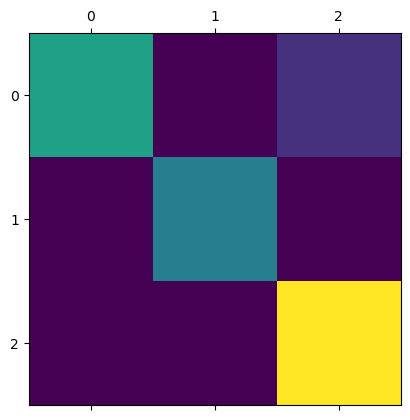

In [13]:
# You can also plot the confusion matrix
plt.matshow(testCM)

In [14]:
# Evaluate the model
accuracy = kNN.score(testData, testY)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9333333333333333


## 5 - SGD

In [15]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(trainData, trainY)


SGDClassifier()

In [16]:
# Check the classifier's performance on the training data
trainPredictions = sgd_classifier.predict(trainData)
trainCM_SGD = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM_SGD)

[[43  0  2]
 [ 0 47  0]
 [ 0  0 43]]


In [17]:
# Make predictions
predictions_SGD = sgd_classifier.predict(testData)
testCM_SGD = confusion_matrix(y_pred=predictions_SGD,y_true=testY)
print(testCM_SGD)

# Evaluate the model
accuracy = sgd_classifier.score(testData, testY)
print("Model Accuracy:", accuracy)

[[3 0 2]
 [0 3 0]
 [0 0 7]]
Model Accuracy: 0.8666666666666667


## 6 - Linear Classification

In [18]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit Linear Classifier
lin_classifier = LinearSVC(max_iter=2000)
lin_classifier.fit(trainData, trainY)

LinearSVC(max_iter=2000)

In [19]:
# Check the classifier's performance on the training data
trainPredictions = lin_classifier.predict(trainData)
trainCM_lin = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM_lin)

[[42  0  3]
 [ 0 47  0]
 [ 2  0 41]]


In [20]:
# Make predictions
predictions_lin = lin_classifier.predict(testData)
testCM_lin = confusion_matrix(y_pred=predictions_lin,y_true=testY)
print(testCM_lin)

# Evaluate the model
accuracy = lin_classifier.score(testData, testY)
print("Model Accuracy:", accuracy)

[[3 0 2]
 [0 3 0]
 [1 0 6]]
Model Accuracy: 0.8
